# Estimation Maximation Algorithm

### Importing Packeges

In [89]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

### creating Gaussian Components

In [ ]:

X1=np.random.normal(size=200)
X2=np.random.normal(size=600)
X=np.concatenate([X1,X2])

sns.kdeplot(X)
plt.title("Estimation of X Density")
plt.xlabel("X")
plt.show()

### Initialising the parameters

In [123]:

# m = mean of data points
# s = standard deviation of data points
# W = weight of  datapoint's sets (Guassian Components)
m1,s1=np.mean(X1),np.std(X1)
m2,s2=np.mean(X2),np.std(X2)
w1,w2=len(X1)/len(X),len(X2)/len(X)
print(w1,w2)

0.25 0.75


### Performing Estimation Maximation process
# Steps Involved
## Initialization :
* First we initialize the mean, standard deviation, and Weight of Each dataset
## Estimation: 
* Select the number of epochs
* We calculate the responsibilities (g) by initialised parameters
* We Normalise the Responsibilities
## Maximization:
* Now, we update the values of each parameter such as mean, standard deviations and weights of Each Gaussian Component
* Thereafter we calculate the Goodness (Log_likelihood) for each epoch
* By the end of epochs we determine the final parameters
* By those parameters we calculate the final responsibilities whose sum is our Final Estimated Density

In [ ]:

epoches=100
log_likelihood=[]

for i in range(epoches):
    # step 1 : Estimating densities
    #Buliding reposiblities(g1)
    # NOte : g1 = probability of how much each datapoint closer to model
    #Formula : weight * pdf(datset,mean,standard deviation)
    g1 = w1 * norm.pdf(X,m1,s1)
    g2 = w2 * norm.pdf(X,m2,s2)
    print("datapoint value :   ",g1[:3])
    # Normalising the responsiblities
    # why should we normalise ?
    # To represnt each datapoint in terms of Probabilty
    total = g1+ g2
    g1/=total
    g2/=total
    # g1 and g2 have proportional values in terms of Probability which indirectly representing datapoints in datasets
    print("proportional value :",g1[:3])
    
    # step 2: maximization - Updating values
    # Formula for Mean Update: sum(g*x)/sum(g)
    # Formula for Standard Deviation update: sqrt(sum(g*(x-m)**2)/sum(g))
    # Formula for weight update : mean(g)

    # Updating means
    m1 = np.sum(X*g1)/np.sum(g1)
    m2 = np.sum(X*g2)/np.sum(g2)
    # Updating std's
    s1 = np.sqrt(np.sum(g1*(X-m1)**2)/np.sum(g1))
    s2 = np.sqrt(np.sum(g2*(X-m2)**2)/np.sum(g2))
    # Updating weights
    w1 = np.mean(g1)
    w2 = np.mean(g2)

    # Step 3: Computing Fitness
    # Since m,s,w are updated, now we are calulcating g1 again
    G1 = w1 * norm.pdf(X,m1,s1)
    G2 = w2 * norm.pdf(X,m2,s2)
    goodness = np.sum(np.log(G1 + G2))
    #print("Goodness :",goodness)
    log_likelihood.append(goodness)

Fitness of Each Epoch
 [-1141.8268173636925, -1141.8267642902886, -1141.8267127269025, -1141.8266625916526, -1141.8266138069455, -1141.8265662992605, -1141.8265199989446, -1141.8264748400163, -1141.8264307599802, -1141.8263876996475, -1141.826345602969, -1141.8263044168734, -1141.826264091114, -1141.8262245781225, -1141.8261858328726, -1141.8261478127465, -1141.8261104774106, -1141.8260737886949, -1141.826037710482, -1141.8260022085994, -1141.825967250716, -1141.8259328062468, -1141.8258988462599, -1141.825865343389, -1141.825832271752, -1141.8257996068708, -1141.8257673255969, -1141.825735406042, -1141.825703827508, -1141.825672570427, -1141.8256416162978, -1141.82561094763, -1141.8255805478893, -1141.825550401447, -1141.82552049353, -1141.8254908101753, -1141.825461338186, -1141.82543206509, -1141.825402979101, -1141.8253740690802, -1141.8253453245025, -1141.8253167354228, -1141.8252882924435, -1141.8252599866855, -1141.8252318097593, -1141.8252037537395, -1141.8251758111376, -1141.8

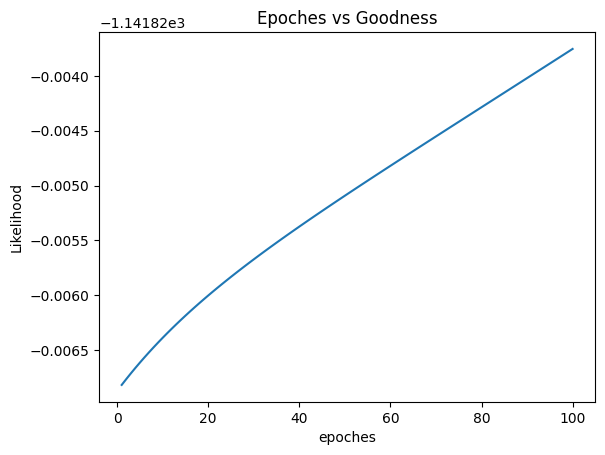

In [142]:
print("Fitness of Each Epoch\n",log_likelihood)
plt.plot(range(1,epoches+1),log_likelihood)
plt.title("Epoches vs Goodness")
plt.xlabel("epoches")
plt.ylabel("Likelihood")
plt.show()

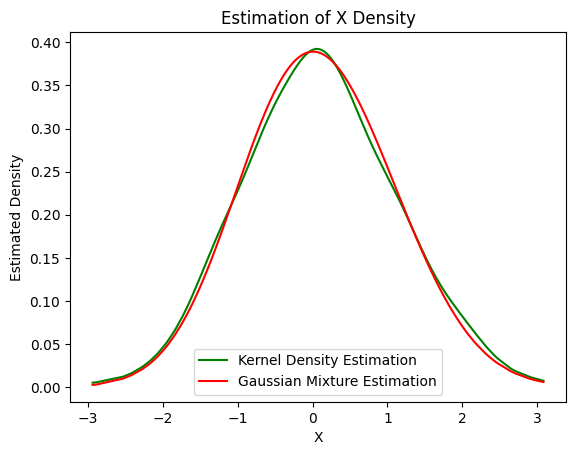

In [148]:
# Plotting  the estimated desnity
X_sort = np.sort(X)
G1 = w1 * norm.pdf(X_sort,m1,s1)
G2 = w2 * norm.pdf(X_sort,m2,s2)
estimated_density = G1+G2
plt.plot(X_sort,gaussian_kde(X_sort)(X_sort),color='green')
plt.plot(X_sort,estimated_density,color='red')
plt.title("Estimation of X Density")
plt.xlabel("X")
plt.ylabel("Estimated Density")
plt.legend(["Kernel Density Estimation",'Gaussian Mixture Estimation'])
plt.show()